# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [ ]:
# call_on_students(1)

#### Answer: 

- Flatten dimensions into one set of values that captures all of the variance by decreasing its complexity. fewer dimensions, no collinearity
- the first principal component explains the most variance


### 2: What are some reasons to use PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- also adds to ease of visualization
- principal components are no longer collinear


### 3: Why is scaling important for PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- because we dont want it to place higher weight on features just because they are larger in scale


### 4: How can one determine how many principle components to use in a model?

In [ ]:
# call_on_students(1)

#### Answer: 

- generally use as many components you need to capture 80% of the variance, but this depends on the data and the user. if you are visualizing, s

## PCA in Code

### Set Up

In [2]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- scale
- 


In [ ]:
# call_on_students(1)

In [3]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [ ]:
# call_on_students(1)

In [9]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA(n_components=.6)

pca.fit(X_scaled)

PCA(n_components=0.6)

### 7: How Much Variance is Explained by the First 2 Components?

In [10]:
# call_on_students(1)

In [11]:

pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [12]:
sum(pca.explained_variance_ratio_)

0.6324320765155943

#### Answer:

- 


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- cluster center is called a centroid
- random cluster centroids are set, then the average dista


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- the method is the elbow plot
- for silhouette its the knife plot, brush up on knife just in case


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- silhouette score- distance between centroids and discance between points assigned.
- while inertia is within clusters, silhouette is across clusters.


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [13]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- 


In [ ]:
# call_on_students(1)

In [19]:
# Code to preprocess the data
scaler = StandardScaler()
# Name the processed data X_processed
X_processed = scaler.fit_transform(X)

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit(X_processed)

AgglomerativeClustering()

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, cluster.labels_)

0.5770346019475988

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [23]:
def test_n_for_clustering(n, data):
    cluster = AgglomerativeClustering(n_clusters=n)
    cluster.fit(data)
    print(silhouette_score(data, cluster.labels_))

In [ ]:
# Fit the object

In [24]:
# Calculate a silhouette score
for n in range(2,9):
    test_n_for_clustering(n,X_processed)

0.5770346019475988
0.4466890410285909
0.4006363159855973
0.33058726295230545
0.31485480100512825
0.316969830299128
0.310946529007258


### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [ ]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    
    # Print the silhouette score
    
    # Return the labels attribute from the fit clustering model
    
    pass

In [ ]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

# 3) Time Series

In [25]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- 


In [ ]:
# call_on_students(1)

In [ ]:
ap['Month'] = 

### 15: Explore Patterns in the Data

In [ ]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- Trends (change in mean over time)
- seasonality
- cyclical/periodicity
- 


Second, plot this time series data. What kinds of patterns do you see in this dataset?

<AxesSubplot:>

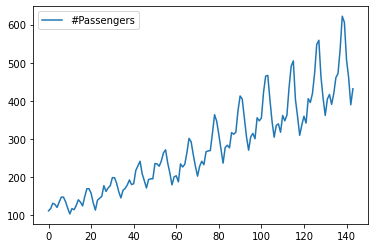

In [26]:
# Code to plot the time series
ap.plot()

### 16: Explore the Moving Average

What window would make sense to use for this data?

- 12, it is in months and it is seasonal


In [ ]:
# call_on_students(1)

In [ ]:
# Code to create the moving average

In [ ]:
# Add to the moving average to the above plot

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- helps focus on the part that requires predicting, so we can regress it against itsel
- make everything independent of time as a function


What can we do to make our data stationary?

- differencing ()
- log transform or any transform
- 


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to check if the data is stationary
Dickey fuller test, dog
statsmodels.tsa.adfuller?

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to try to make the data stationary
moving_average_ap = ap.rolling(window=12).mean()
moving_average_ap

# Code here to check if the data is stationary
remember to use pandas diff as opposed to numpy

# ARIMA

baseline is 0, 0, 0

p = lags from baseline model and
kakapo



<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [ ]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. lowercase, punct, nums
2. stem/lemma
3. tokenize

- lemma tells the part of speech, where stemming collapses into

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- columns associated with words and rows associated with documents


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- term frequency, inverse document frequency     how rare is this word? num times it appears overall


## NLP in Code

### Set Up

In [27]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [28]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\r\n...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [ ]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies[])

In [ ]:
# Import the relevant vectorizer

In [ ]:
# Instantiate it

In [ ]:
# Fit it

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [30]:
# Code here to transform train and test sets with the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer()
# use min and max df for cutoffs to raise the score.

In [ ]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model


In [ ]:
# Code here to evaluate your model on the test set